# V2

In [21]:
#importation des packages de base pour le traitement des données 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import missingno as msno
from tabulate import tabulate 
%matplotlib inline 

# pas de warning
from warnings import filterwarnings
filterwarnings("ignore")

In [22]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max.columns', df.shape[1])
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Suppression de la colonne des identifiants des clients

In [23]:
df = df.drop(columns=["customerID"], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Analyse Descritive Univariée

**1. Description des variables de la base de données**

- ``customerID`` : ID du client

- ``gender`` : Si le client est un homme ou une femme

- ``SeniorCitizen`` : si le client est une personne âgée

- ``Partner`` : Si le client a un partenaire (Oui, Non)

- ``Dependents`` : Si le client a des personnes à charge (Oui, Non)

- ``tenure`` : Nombre de mois pendant lesquels le client est resté dans l'entreprise

- ``PhoneService`` :  Le client dispose-t-il d'un service téléphonique (oui, non) ?

- ``MultipleLines`` : Le client dispose-t-il de plusieurs lignes (Oui, Non, Pas de service téléphonique) ?

- ``InternetService`` : Le fournisseur d'accès internet du client (DSL, fibre optique, non)

- ``OnlineSecurity`` : Le client dispose-t-il d'une sécurité en ligne (Oui, Non, Pas de service internet) ?

- ``OnlineBackup`` : Le client dispose ou non d'une sauvegarde en ligne (Oui, Non, Pas de service internet)

- ``DeviceProtection`` : Le client dispose-t-il d'une protection de son appareil (Oui, Non, Pas de service internet) ?

- ``TechSupport`` : Indique si le client dispose d'une assistance technique (Oui, Non, Pas de service internet)

- ``StreamingTV`` : Indique si le client dispose d'un service de télévision en continu (Oui, Non, Pas de service internet)

- ``StreamingMovies`` : Indique si le client dispose d'un service de diffusion de films en continu (Oui, Non, Pas de service internet)

- ``Contrat`` : La durée du contrat du client (mois par mois, un an, deux ans)

- ``PaperlessBilling`` : Indique si le client dispose d'un service de facturation sans papier (Oui, Non)

- ``PaymentMethod`` : Indique le mode de paiement (Chèque électronique, Chèque postal, Virement bancaire (automatique), Carte de crédit (automatique))

- ``MonthlyCharges`` : Indique le coût mensuel actuel de l'abonnement du client.

- ``TotalCharges`` : Indique le total des frais payés par le client jusqu'à présent.

`Churn` : Indique si le client c'est désabonné ou non.

**Identification du type de données** 

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Transformation de la variable `Charges totales` en type `numérique`**

In [25]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].dtype

dtype('float64')

**Conversion de la variable `citoyen d'age mûr` en variable catégorielle** 

In [26]:
df["SeniorCitizen"].replace(to_replace=[0, 1], value=["No", "Yes"], inplace=True)

**Vérification des doublons dans la base de données** 

In [27]:
# Vérifier les doublons
duplicates =df.duplicated()
print(f"Nombre de lignes dupliquées : {duplicates.sum()}")

Nombre de lignes dupliquées : 22


Suppressions des doublons 

In [28]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(7021, 20)

## Statistique descrive sur les différentes variables de la base données

**Analyse des données manquantes de la base de données**

In [29]:
# Tableau des valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (missing_values / df.shape[0]) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)

                  Missing Values  Percentage
gender                         0    0.000000
SeniorCitizen                  0    0.000000
Partner                        0    0.000000
Dependents                     0    0.000000
tenure                         0    0.000000
PhoneService                   0    0.000000
MultipleLines                  0    0.000000
InternetService                0    0.000000
OnlineSecurity                 0    0.000000
OnlineBackup                   0    0.000000
DeviceProtection               0    0.000000
TechSupport                    0    0.000000
StreamingTV                    0    0.000000
StreamingMovies                0    0.000000
Contract                       0    0.000000
PaperlessBilling               0    0.000000
PaymentMethod                  0    0.000000
MonthlyCharges                 0    0.000000
TotalCharges                  11    0.156673
Churn                          0    0.000000


**Traitement des données manquantes**

In [30]:
#importation des libraries necessaires
from sklearn.impute import KNNImputer 
#KNNImputer avec un nombre de voisins égale à 3
df[["TotalCharges"]] = KNNImputer(n_neighbors=3).fit_transform(df[["TotalCharges"]])

# Tableau des valeurs manquantes par colonne
missing_values = df.isnull().sum()
missing_percent = (missing_values / df.shape[0]) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)


                  Missing Values  Percentage
gender                         0         0.0
SeniorCitizen                  0         0.0
Partner                        0         0.0
Dependents                     0         0.0
tenure                         0         0.0
PhoneService                   0         0.0
MultipleLines                  0         0.0
InternetService                0         0.0
OnlineSecurity                 0         0.0
OnlineBackup                   0         0.0
DeviceProtection               0         0.0
TechSupport                    0         0.0
StreamingTV                    0         0.0
StreamingMovies                0         0.0
Contract                       0         0.0
PaperlessBilling               0         0.0
PaymentMethod                  0         0.0
MonthlyCharges                 0         0.0
TotalCharges                   0         0.0
Churn                          0         0.0


**Afficher les statistiques descritives des variables numériques**

In [31]:
summary = df.describe()
print(tabulate(summary, headers="keys", tablefmt = "fancy_grid", numalign="center"))

╒═══════╤══════════╤══════════════════╤════════════════╕
│       │  tenure  │  MonthlyCharges  │  TotalCharges  │
╞═══════╪══════════╪══════════════════╪════════════════╡
│ count │   7021   │       7021       │      7021      │
├───────┼──────────┼──────────────────┼────────────────┤
│ mean  │ 32.4694  │     64.8519      │    2290.35     │
├───────┼──────────┼──────────────────┼────────────────┤
│ std   │  24.535  │      30.069      │    2265.04     │
├───────┼──────────┼──────────────────┼────────────────┤
│ min   │    0     │      18.25       │      18.8      │
├───────┼──────────┼──────────────────┼────────────────┤
│ 25%   │    9     │      35.75       │     411.15     │
├───────┼──────────┼──────────────────┼────────────────┤
│ 50%   │    29    │       70.4       │    1410.25     │
├───────┼──────────┼──────────────────┼────────────────┤
│ 75%   │    55    │       89.9       │     3801.7     │
├───────┼──────────┼──────────────────┼────────────────┤
│ max   │    72    │      118.7

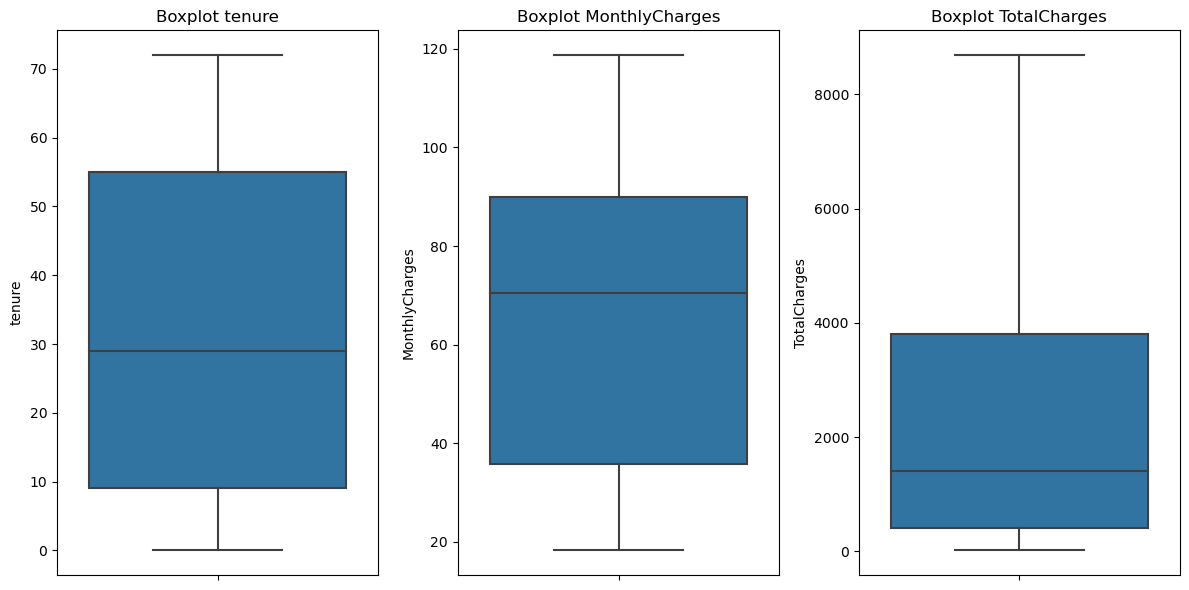

In [35]:
#création de boxplots univariés de chaque variables numériques de la base
fig, ax = plt.subplots(1, 3, figsize = (12, 6))

df_numeric = df[["tenure", "MonthlyCharges", "TotalCharges"]]
for i , col in enumerate(df_numeric):
    sns.boxplot(y = col, data = df_numeric, ax = ax[i])
    ax[i].set_title(f"Boxplot {col}")
    
plt.tight_layout();

**Statistiques descriptives des variables catégorielles**

In [33]:
for col in df.select_dtypes('object'):
    print(f'{col:-<50} {df[col].unique()}')

gender-------------------------------------------- ['Female' 'Male']
SeniorCitizen------------------------------------- ['No' 'Yes']
Partner------------------------------------------- ['Yes' 'No']
Dependents---------------------------------------- ['No' 'Yes']
PhoneService-------------------------------------- ['No' 'Yes']
MultipleLines------------------------------------- ['No phone service' 'No' 'Yes']
InternetService----------------------------------- ['DSL' 'Fiber optic' 'No']
OnlineSecurity------------------------------------ ['No' 'Yes' 'No internet service']
OnlineBackup-------------------------------------- ['Yes' 'No' 'No internet service']
DeviceProtection---------------------------------- ['No' 'Yes' 'No internet service']
TechSupport--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingTV--------------------------------------- ['No' 'Yes' 'No internet service']
StreamingMovies----------------------------------- ['No' 'Yes' 'No internet service'

In [32]:
summary = df.describe(include='O')
print(tabulate(summary, headers="keys", tablefmt = "fancy_grid", numalign="center"))

╒════════╤══════════╤═════════════════╤═══════════╤══════════════╤════════════════╤═════════════════╤═══════════════════╤══════════════════╤════════════════╤════════════════════╤═══════════════╤═══════════════╤═══════════════════╤════════════════╤════════════════════╤══════════════════╤═════════╕
│        │ gender   │ SeniorCitizen   │ Partner   │ Dependents   │ PhoneService   │ MultipleLines   │ InternetService   │ OnlineSecurity   │ OnlineBackup   │ DeviceProtection   │ TechSupport   │ StreamingTV   │ StreamingMovies   │ Contract       │ PaperlessBilling   │ PaymentMethod    │ Churn   │
╞════════╪══════════╪═════════════════╪═══════════╪══════════════╪════════════════╪═════════════════╪═══════════════════╪══════════════════╪════════════════╪════════════════════╪═══════════════╪═══════════════╪═══════════════════╪════════════════╪════════════════════╪══════════════════╪═════════╡
│ count  │ 7021     │ 7021            │ 7021      │ 7021         │ 7021           │ 7021            │ 7021

**Répartition de la variable Churn**

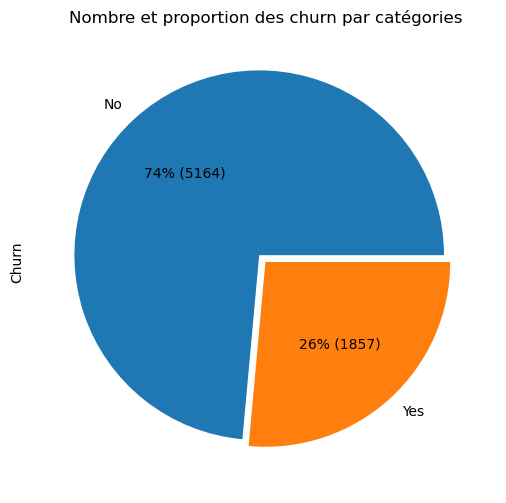

In [34]:
#calculer la proportion et le nombre de chaque catégorie
#calcul de la proportion de chaque catégorie
prop = df["Churn"].value_counts().reset_index()
prop.columns = ["Churn", "proportion"]

#graphique en secteur pour les frequences de chaque catégorie
plt.figure(figsize = (8, 6))
ax = df["Churn"].value_counts().plot(kind = "pie", explode = (0.05,0), autopct = lambda x: f'{x:.0f}% ({x/100*len(df):.0f})')

#ajustement du titre
plt.title("Nombre et proportion des churn par catégories");

**Analyse de la normalité pour vérifier si les variables sont normalement distribuées**

In [36]:
# importation de package 
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors
import statsmodels.api as sm

**Utilisation des graphiques pour vérifier la normalité**

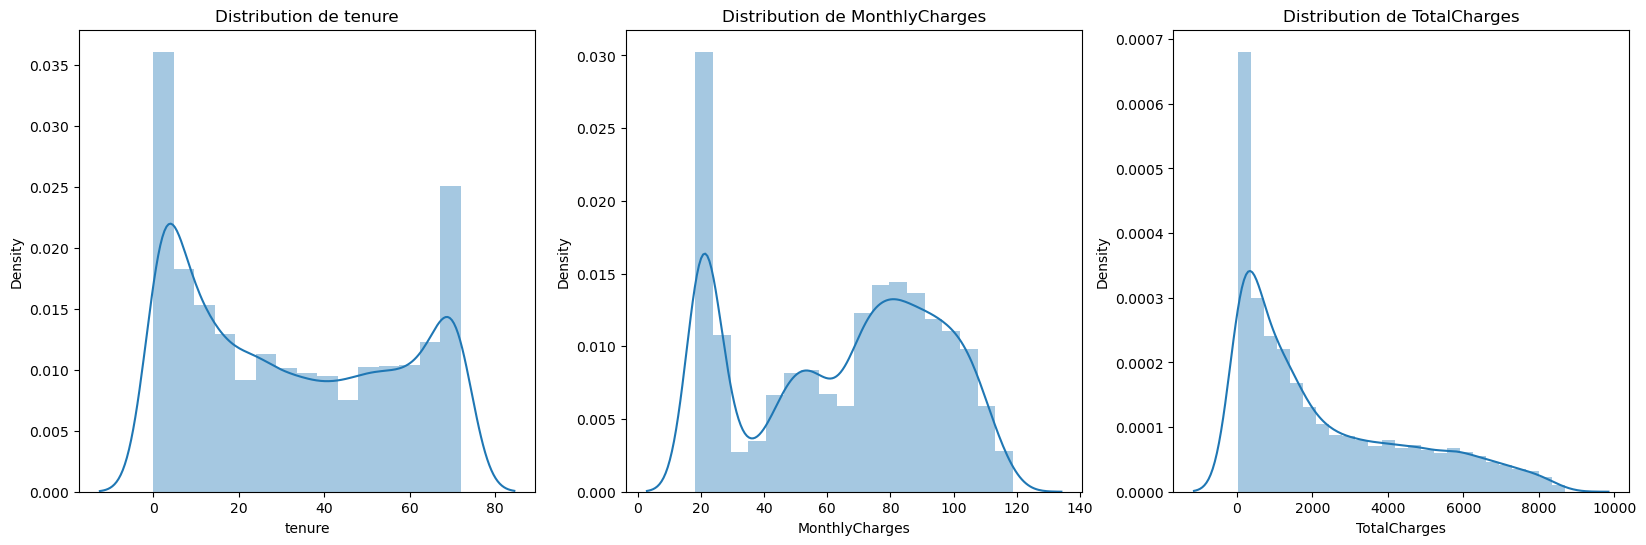

In [39]:
fig, ax = plt.subplots(1, 3, figsize = (20, 6))
for i, col in enumerate(df_numeric):
    sns.distplot(df_numeric[col], ax = ax[i])
    ax[i].set_title(f"Distribution de {col}");

**QQplot des variables**

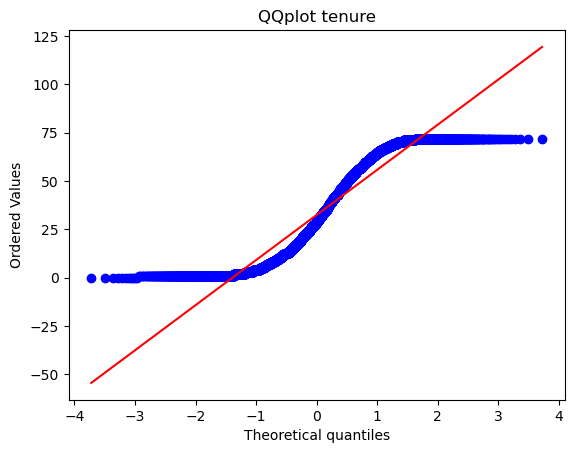

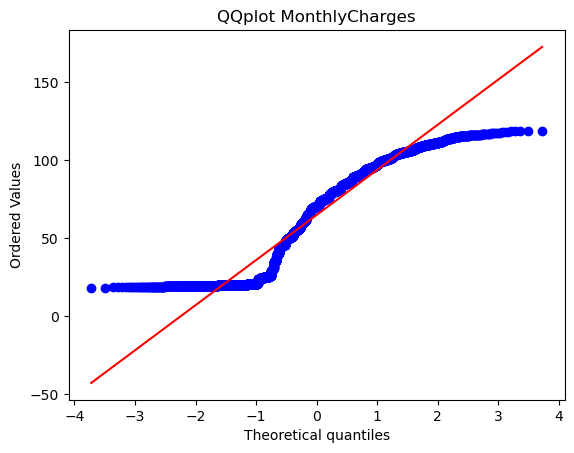

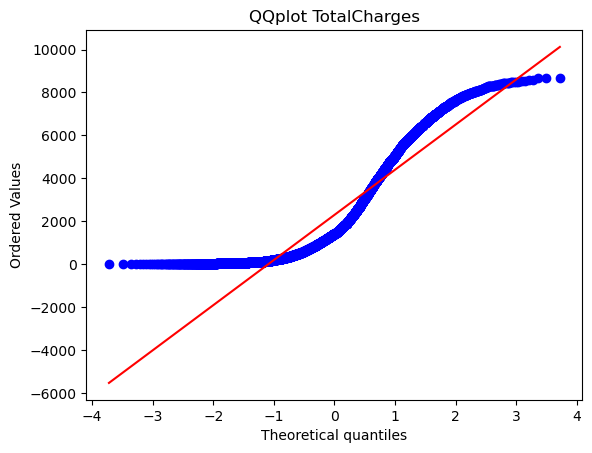

In [40]:
for col in df_numeric:
    plt.figure()
    stats.probplot(df_numeric[col], plot=plt)
    plt.title(f"QQplot {col}");

Utilisation des tests statistiques pour vérifier la normalité

In [41]:
def normal_test(alpha, data):
     # Effectuer les tests de normalité
    shapiro_test = stats.shapiro(data)

    # Créer un tableau pandas avec les résultats des tests
    test_results = pd.DataFrame({
        'Nom du test': ['Shapiro-Wilk'],
        'Statistique de test': [shapiro_test[0]],
        'p-valeur': [shapiro_test[1]],
        'Normalité': ['Oui' if shapiro_test[1] > alpha else 'Non']})

    print(test_results);

In [42]:
results = pd.DataFrame({normal_test(0.05, df_numeric["tenure"]), 
                        normal_test(0.05, df_numeric["MonthlyCharges"]),
                        normal_test(0.05, df_numeric["TotalCharges"])})

results

    Nom du test  Statistique de test  p-valeur Normalité
0  Shapiro-Wilk             0.904353       0.0       Non
    Nom du test  Statistique de test  p-valeur Normalité
0  Shapiro-Wilk              0.92115       0.0       Non
    Nom du test  Statistique de test  p-valeur Normalité
0  Shapiro-Wilk             0.861463       0.0       Non


,0
0,None


## Analyse Descritive Bivariée

In [43]:
# Importation du package
import scipy.stats as st

#### Analyse de la liaison entre deux variables quantitatives

Matrice de correlation 

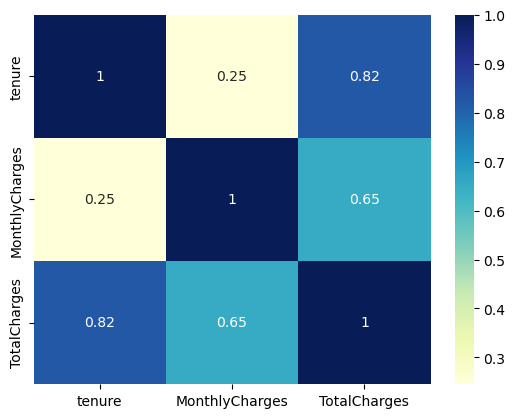

In [44]:
# Obtenir le tableau de corélation et la heatmap
corr_matrix = df_numeric[["tenure", "MonthlyCharges", "TotalCharges"]].corr()
# Calcul des p-values pour chaque paire de variables
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu");

#### Test de corrélation de Pearson

In [45]:
# Analyse de la correlation de pearson
from scipy.stats import pearsonr
# Variables quantitatives d'intérêt
var1 = "tenure"
var2 = "MonthlyCharges"
var3 = "TotalCharges"

In [46]:
# Calculer du coefficient de corrélation de Spearman
stat, p_value = pearsonr(df_numeric[var1], df_numeric[var2])
print(f'La statistique de pearson est de {stat} avec de un niveau de significativité de {p_value}')

La statistique de pearson est de 0.24525123028825707 avec de un niveau de significativité de 1.0968699941899726e-96


In [49]:
# Calculer du coefficient de corrélation de Spearman
stat, p_value = pearsonr(df_numeric[var1], df_numeric[var3])
print(f'La statistique de pearson est de {stat} avec de un niveau de significativité de {p_value}')

La statistique de pearson est de 0.8241580273202869 avec de un niveau de significativité de 0.0


In [50]:
# Calculer du coefficient de corrélation de Spearman
stat, p_value = pearsonr(df_numeric[var3], df_numeric[var2])
print(f'La statistique de pearson est de {stat} avec de un niveau de significativité de {p_value}')

La statistique de pearson est de 0.649938685099213 avec de un niveau de significativité de 0.0


### Analyse de la liaison entre la variable Churn et les autres variables qualitatives

## Coefficient T de Tschuprow

In [51]:
# Calcul de chi deux sur la base de données
from scipy.stats import chi2_contingency

def tests_varqual(data1, data2):
    # Créer un graphique de la relation entre le nombre de desabonnement et la variable selectionnée
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=data1, hue=data2)
    plt.xlabel(f'{data1.name}')
    plt.title(f'Relation entre le nombre de Churn et la variable {data1.name}')
    plt.show()
    
    # Créer un tableau de contingence
    contingency_table = pd.crosstab(data1, data2)
    print("matice de contingence (Frequences observées)")
    print(contingency_table)
    print("\n")
    
    # Calculer le coefficient T de Tschuprow
    n = df.shape[0]
    min_dim = min(contingency_table.shape) - 1
    # Effectuer le test du chi-carré
    chi2, p_value, _, _ = st.chi2_contingency(contingency_table)
    tschuprow_t = np.sqrt(chi2 / (n * min_dim))

    print("Coefficient T de Tschuprow :", tschuprow_t)
    print("P-valeur :", p_value)

**Relation entre les variables `Churn` et `gender`**

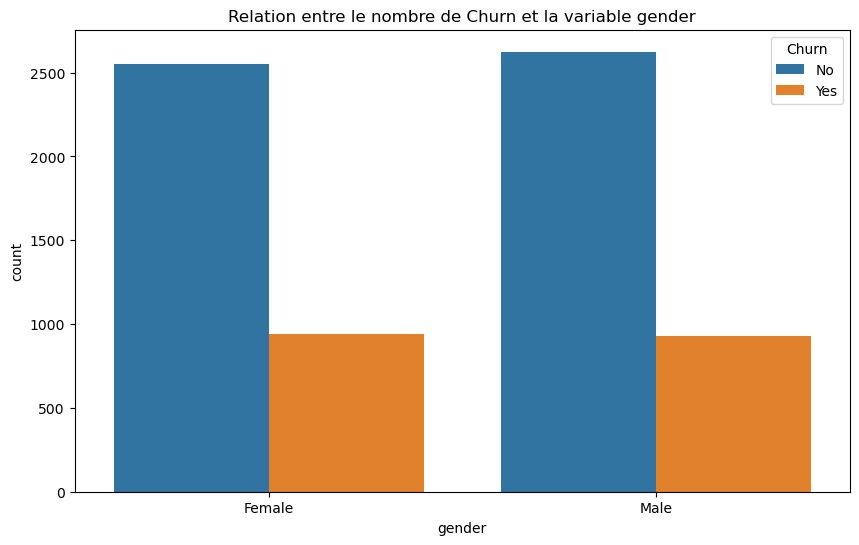

matice de contingence (Frequences observées)
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


Coefficient T de Tschuprow : 0.008290505631771371
P-valeur : 0.48657873605618596


In [28]:
tests_varqual(df['gender'], df['Churn'])

**Etude de la liaison entre le fait que le client soit plus âgé et le désabonnement.** 

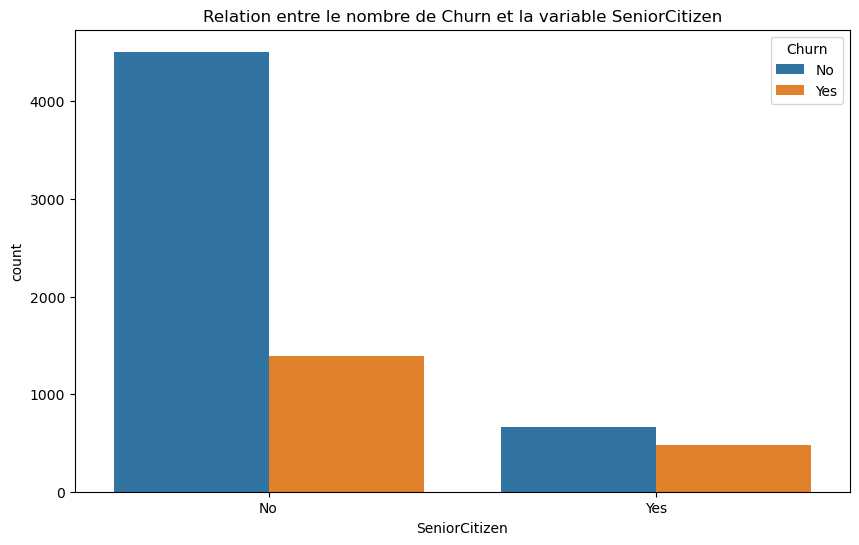

matice de contingence (Frequences observées)
Churn            No   Yes
SeniorCitizen            
No             4508  1393
Yes             666   476


Coefficient T de Tschuprow : 0.15045309974200427
P-valeur : 1.510066805092378e-36


In [29]:
tests_varqual(df['SeniorCitizen'], df['Churn'])

**etude de la relation entre le fait que le client ait un partenaire ou non et la fidélité/rétention du client.**

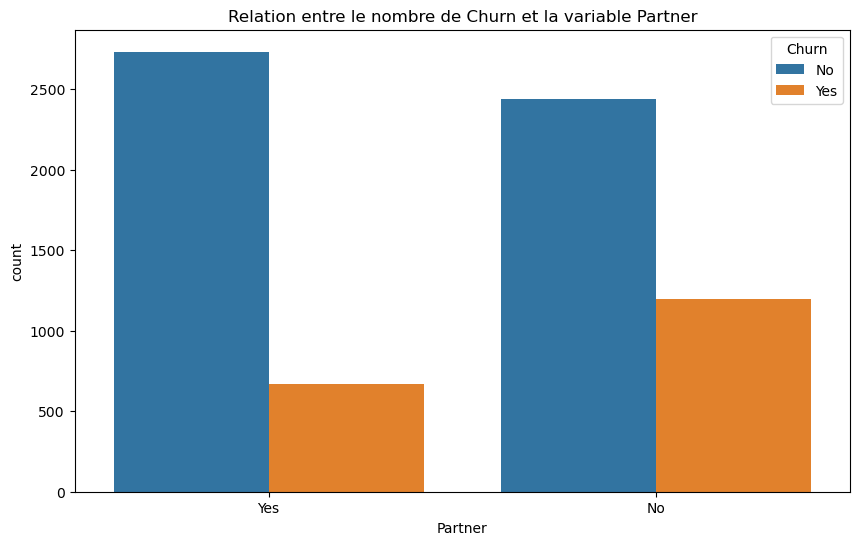

matice de contingence (Frequences observées)
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669


Coefficient T de Tschuprow : 0.15012578474988478
P-valeur : 2.1399113440759935e-36


In [30]:
tests_varqual(df['Partner'], df['Churn'])

**Etude de la liaison entre les variables `le client a des personnes à charge` et `le de désabonnement`**

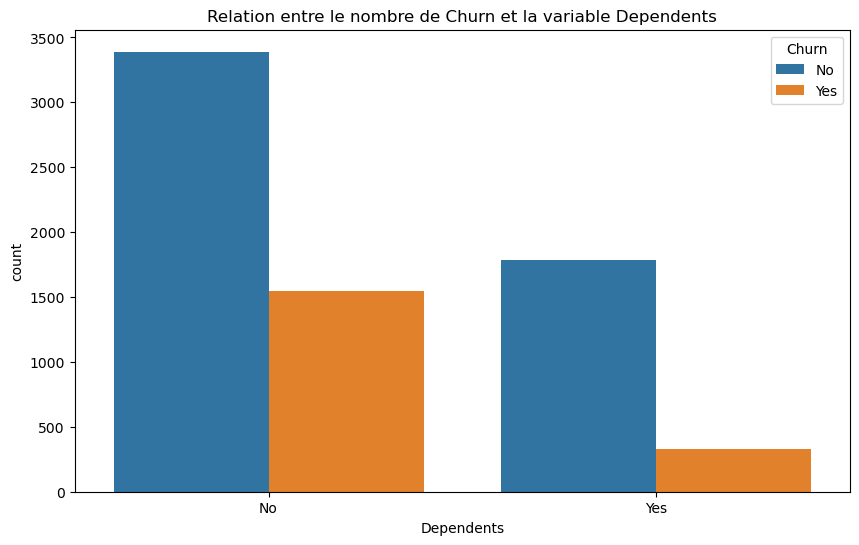

matice de contingence (Frequences observées)
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326


Coefficient T de Tschuprow : 0.1638703967886369
P-valeur : 4.9249216612154196e-43


In [31]:
tests_varqual(df['Dependents'], df['Churn'])

**Etude de la liaison entre les variables `Le client dispose-t-il d'un service téléphonique ou non (oui, non) ?` et `nombre de désabonnement`**

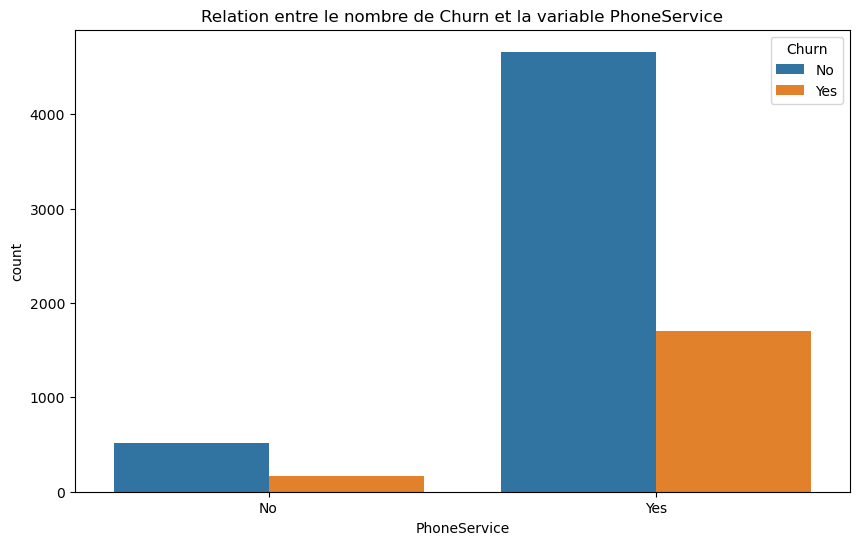

matice de contingence (Frequences observées)
Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699


Coefficient T de Tschuprow : 0.011398285522718045
P-valeur : 0.3387825358066928


In [32]:
tests_varqual(df['PhoneService'], df['Churn'])

**Etude de la liaison entre les variables : `le client dispose-t-il de plusieurs lignes ou non (oui, non, pas de service téléphonique) ?` et `nombre de désabonnement`**

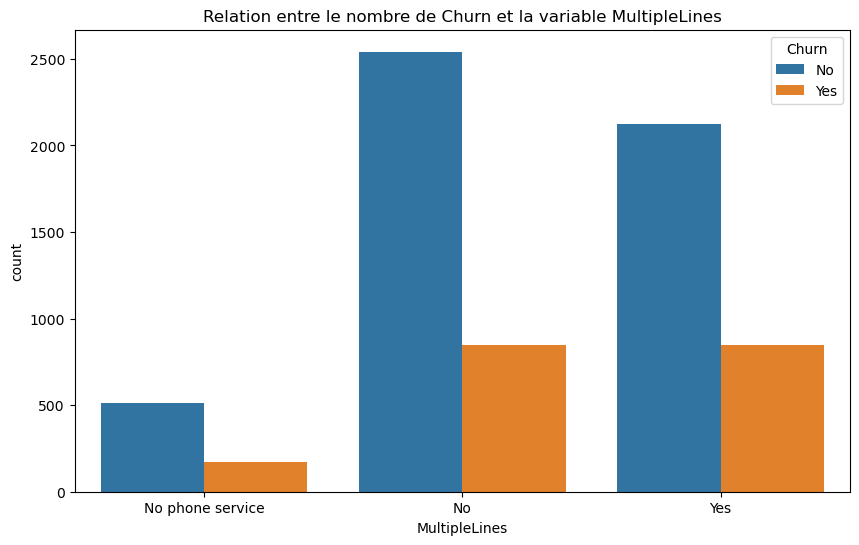

matice de contingence (Frequences observées)
Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850


Coefficient T de Tschuprow : 0.04010925283378871
P-valeur : 0.0034643829548773


In [33]:
tests_varqual(df['MultipleLines'], df['Churn'])

**Etude de la liaison entre les variables : `Fournisseur d'accès à l'internet du client (DSL, fibre optique, non)` et `nombre de désabonnement`**

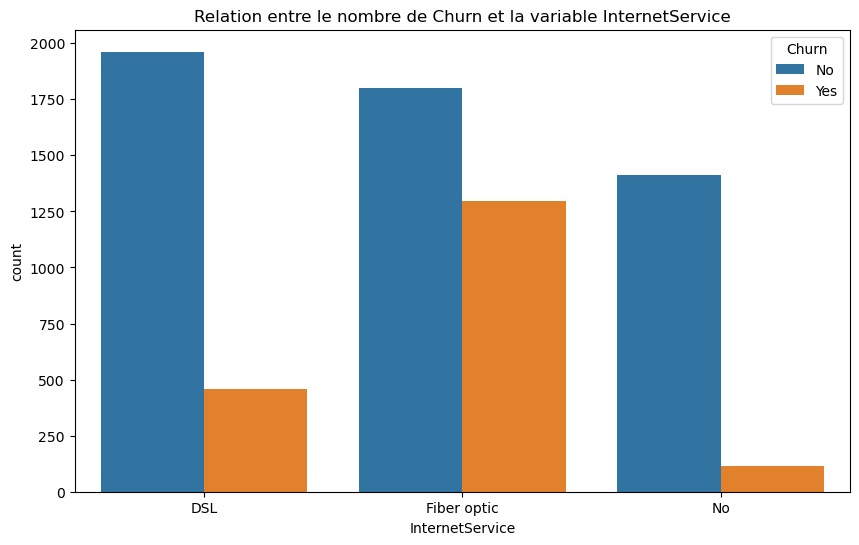

matice de contingence (Frequences observées)
Churn              No   Yes
InternetService            
DSL              1962   459
Fiber optic      1799  1297
No               1413   113


Coefficient T de Tschuprow : 0.32245455521230887
P-valeur : 9.571788222840544e-160


In [34]:
tests_varqual(df['InternetService'], df['Churn'])

Etude de la liaison entre les variables : `Le client dispose-t-il ou non d'une sécurité en ligne (oui, non, pas de service internet) ?` et `nombre de désabonnement`

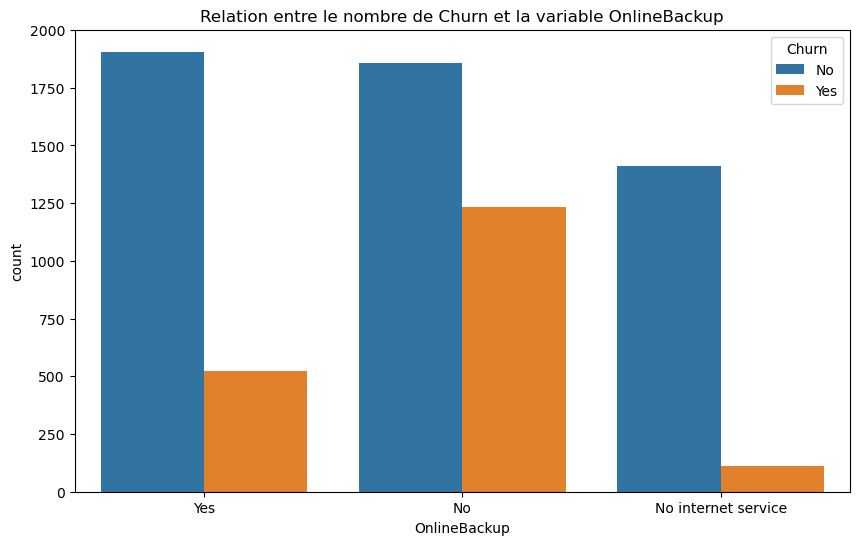

matice de contingence (Frequences observées)
Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523


Coefficient T de Tschuprow : 0.2923155121954445
P-valeur : 2.0797592160864276e-131


In [35]:
tests_varqual(df['OnlineBackup'], df['Churn'])

Etude de la liaison entre les variables : `Si le client dispose ou non d'une protection des appareils (oui, non, pas de service internet)` et `nombre de désabonnement`

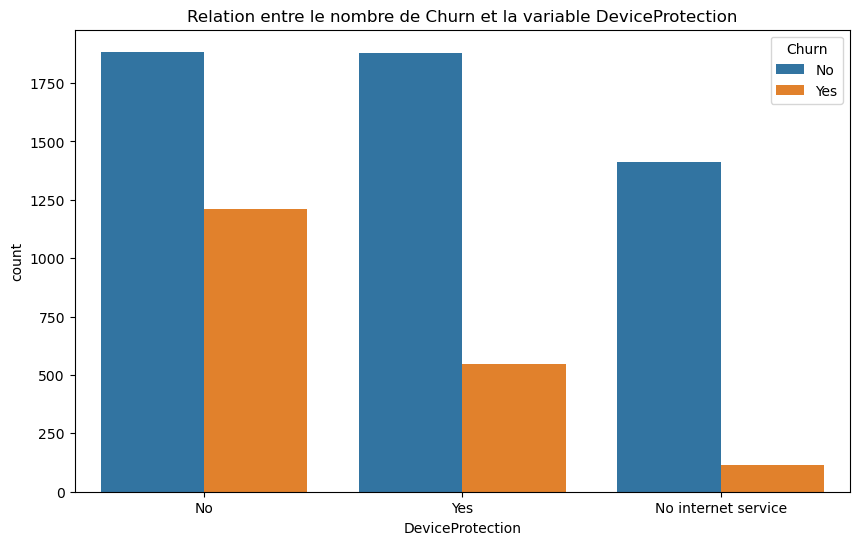

matice de contingence (Frequences observées)
Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545


Coefficient T de Tschuprow : 0.281579732968073
P-valeur : 5.505219496457244e-122


In [36]:
tests_varqual(df['DeviceProtection'], df['Churn'])

Etude de la liaison entre les variables : `Si le client dispose ou non d'une assistance technique (Oui, Non, Pas de service internet)` et `nombre de désabonnement`

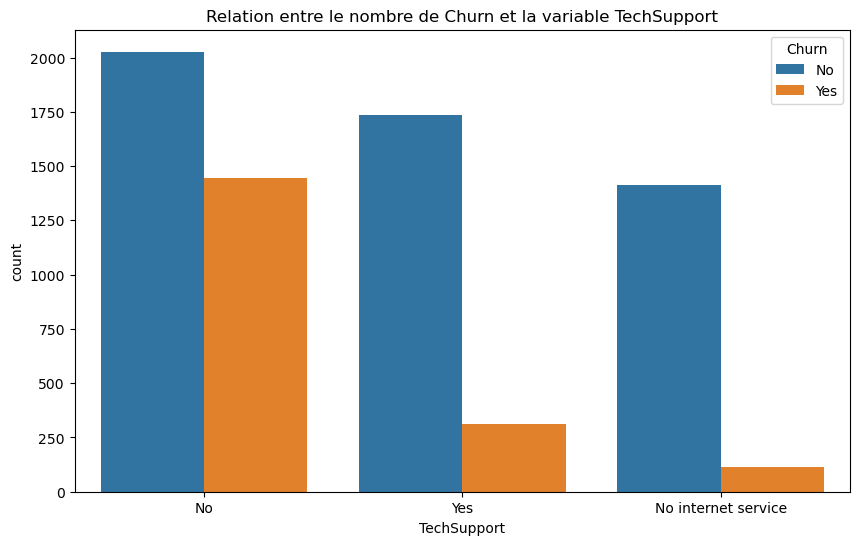

matice de contingence (Frequences observées)
Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310


Coefficient T de Tschuprow : 0.3429161982469257
P-valeur : 1.4430840279998987e-180


In [37]:
tests_varqual(df['TechSupport'], df['Churn'])

Etude de la liaison entre les variables : `Le client dispose-t-il ou non d'un service de télévision en continu (oui, non, pas de service internet) ?` et `nombre de désabonnement`

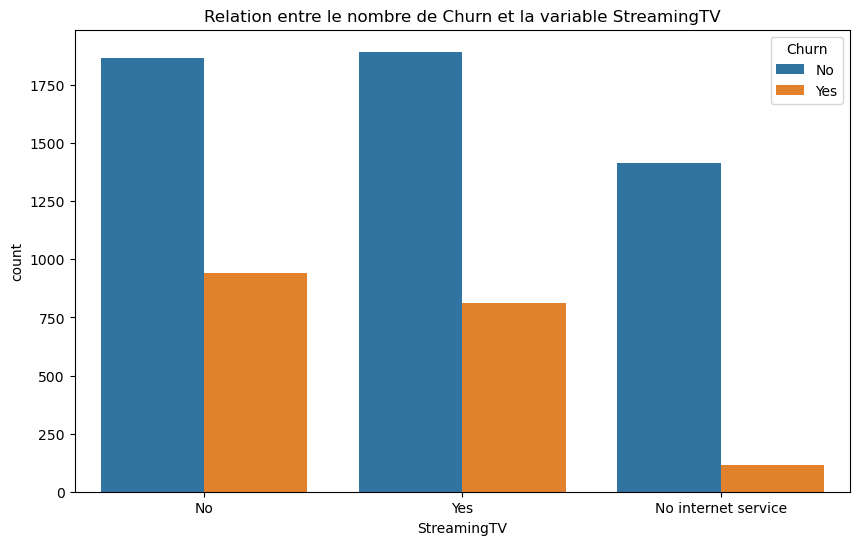

matice de contingence (Frequences observées)
Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814


Coefficient T de Tschuprow : 0.2305023384466809
P-valeur : 5.528994485739183e-82


In [38]:
tests_varqual(df['StreamingTV'], df['Churn'])

Etude de la liaison entre les variables : `Le client dispose-t-il de films en streaming ou non (oui, non, pas de service internet) ?` et `nombre de désabonnement`

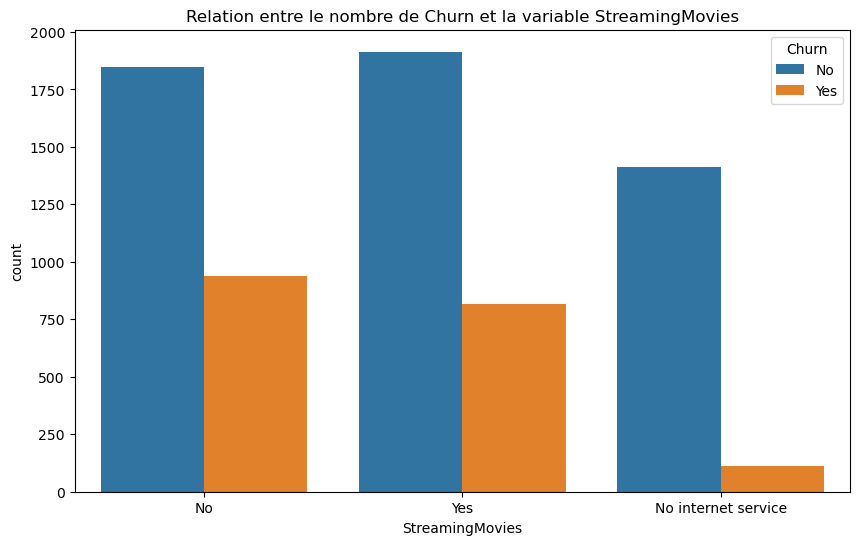

matice de contingence (Frequences observées)
Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818


Coefficient T de Tschuprow : 0.23095080906926801
P-valeur : 2.667756755723681e-82


In [39]:
tests_varqual(df['StreamingMovies'], df['Churn'])

Etude de la liaison entre les variables : `La durée du contrat du client (mois par mois, un an, deux ans)` et `la fidélisation/rétention du client`

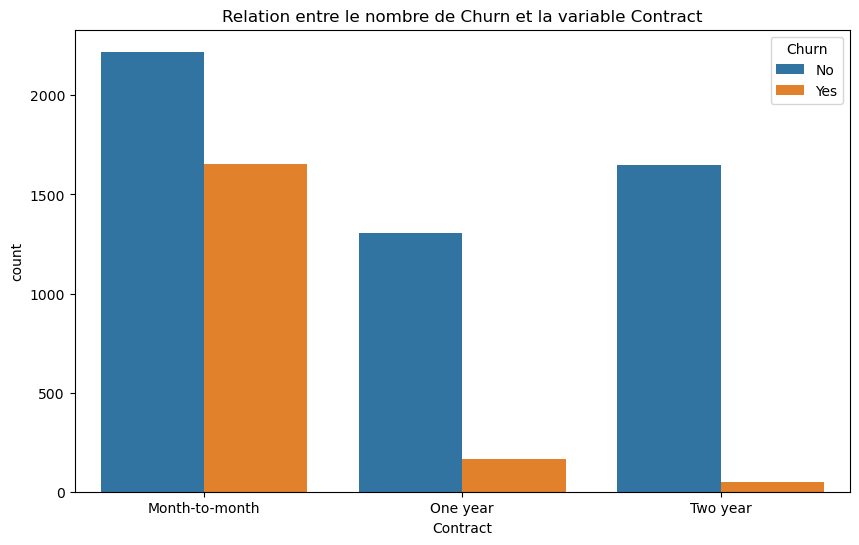

matice de contingence (Frequences observées)
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


Coefficient T de Tschuprow : 0.4101156965761409
P-valeur : 5.863038300673391e-258


In [40]:
tests_varqual(df['Contract'], df['Churn'])

Etude de la liaison entre les variables : `Le client dispose-t-il ou non d'un système de facturation sans papier (oui, non) ?` et `la fidélisation/rétention du client`

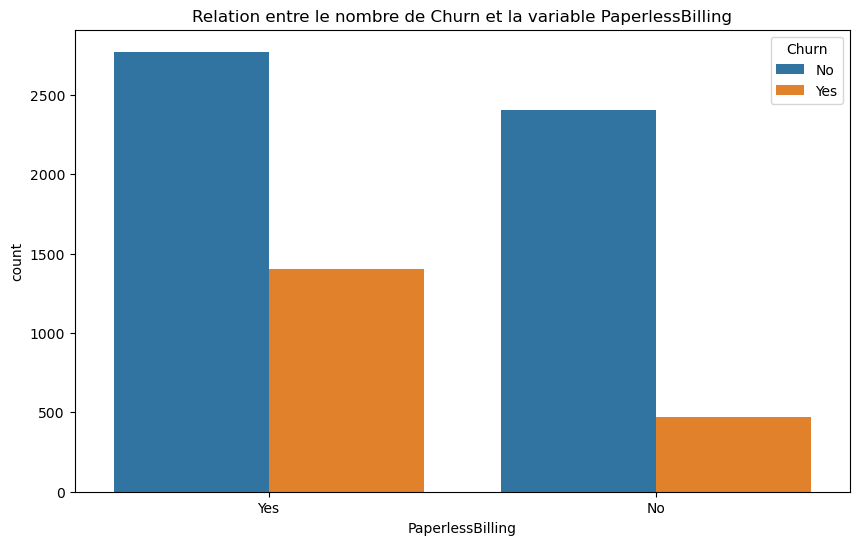

matice de contingence (Frequences observées)
Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400


Coefficient T de Tschuprow : 0.19149814355338285
P-valeur : 4.073354668665985e-58


In [41]:
tests_varqual(df['PaperlessBilling'], df['Churn'])

Etude de la liaison entre les variables : `Le mode de paiement du client (chèque électronique, chèque postal, virement bancaire (automatique), carte de crédit (automatique))` et `la fidélisation/rétention du client`

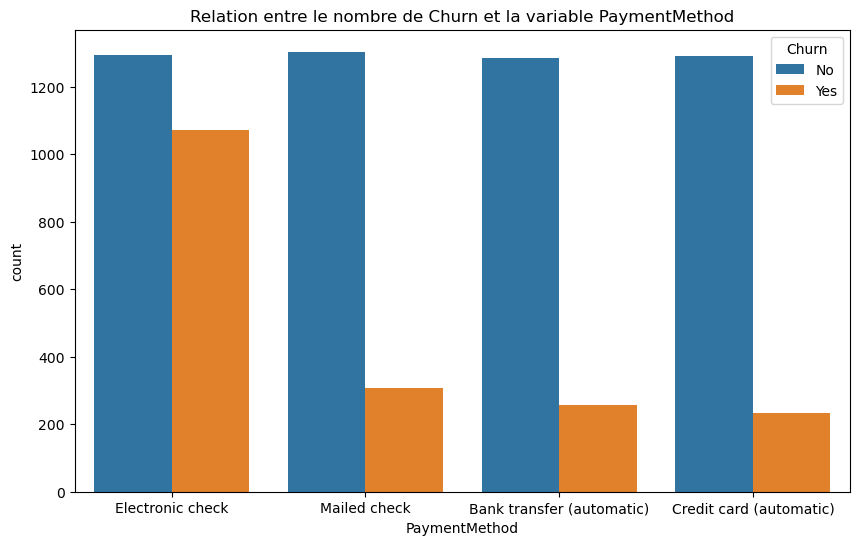

matice de contingence (Frequences observées)
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


Coefficient T de Tschuprow : 0.30335862555407056
P-valeur : 3.6823546520097993e-140


In [42]:
tests_varqual(df['PaymentMethod'], df['Churn'])

Etude de la relation entre les variables `StreamingTV` client disposant d'un service de télévision en continue et `StreamingMovies` clients disposant des films streaming

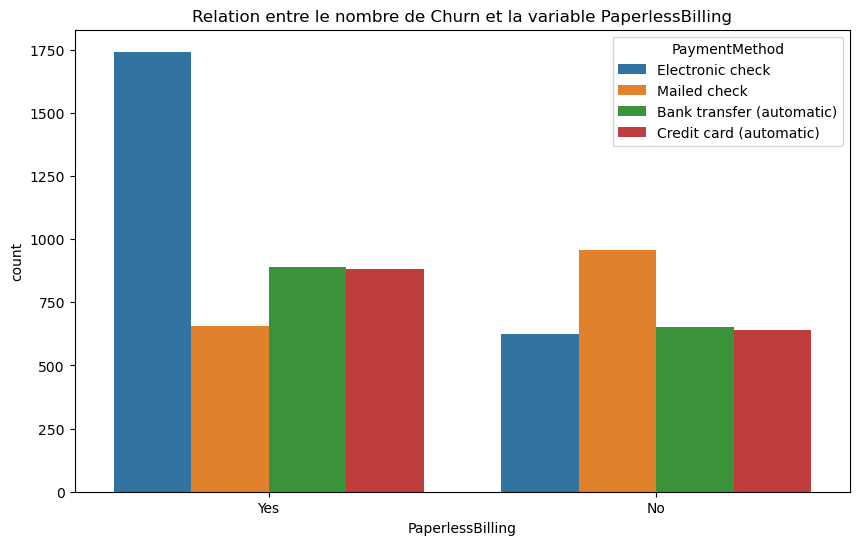

matice de contingence (Frequences observées)
PaymentMethod     Bank transfer (automatic)  Credit card (automatic)  \
PaperlessBilling                                                       
No                                      653                      640   
Yes                                     891                      882   

PaymentMethod     Electronic check  Mailed check  
PaperlessBilling                                  
No                             623           956  
Yes                           1742           656  


Coefficient T de Tschuprow : 0.2487185726719847
P-valeur : 4.115239070710319e-94


In [43]:
tests_varqual(df['PaperlessBilling'], df['PaymentMethod'])

## Analyse de la liaison entre une variable qualitative et une variable quantitative

#### Test de Kruskal-Wallis


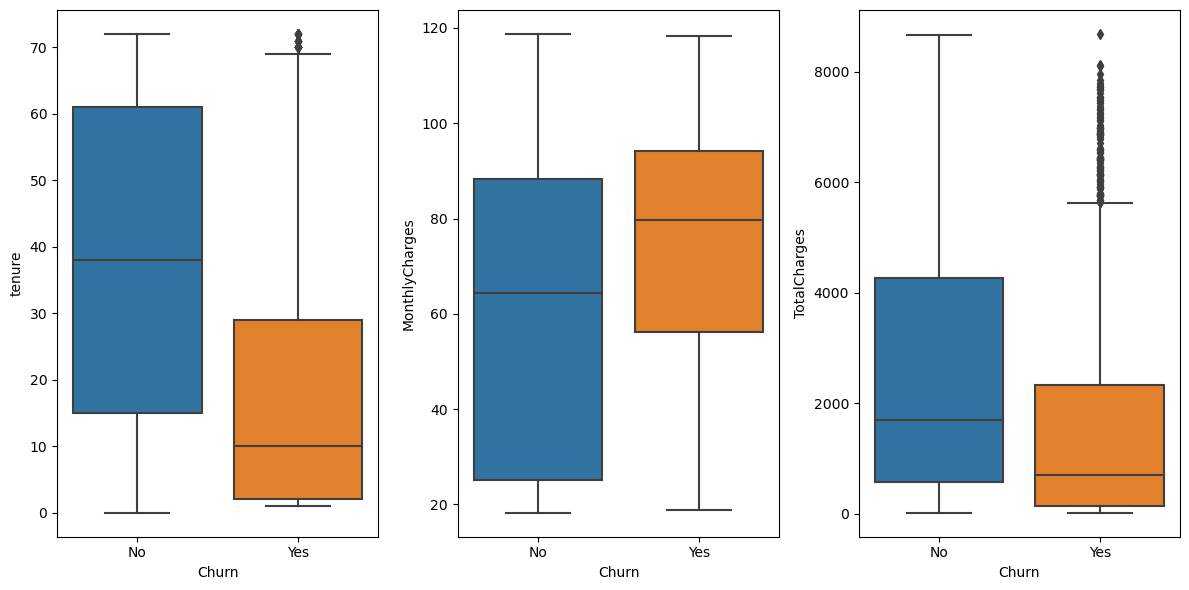

In [44]:
#boxplot pour chaque modalité de catégorie par rapport à la variable Churn
fig, ax = plt.subplots(1, 3, figsize = (12, 6))

for i, col in enumerate(df_numeric[["tenure", "MonthlyCharges", "TotalCharges"]]):
    sns.boxplot(x = "Churn", y = col, data = df, ax = ax[i])
    
plt.tight_layout();

In [45]:
from scipy.stats import kruskal

tenure_yes = df[df['Churn'] == 'Yes']['tenure']
tenure_no = df[df['Churn'] == 'No']['tenure']

# Test de Kruskal-Wallis
kruskal_stat, kruskal_p_value = kruskal(tenure_yes, tenure_no)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 948.7996915155916
P-valeur (Kruskal-Wallis) : 2.4191401818659714e-208


In [46]:
# Séparer les données en groupes en fonction des modalités de chaque catégorie
monthly_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
monthly_no = df[df['Churn'] == 'No']['MonthlyCharges']

# Test de Kruskal-Wallis
kruskal_stat, kruskal_p_value = kruskal(monthly_yes, monthly_no)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 240.34263218324136
P-valeur (Kruskal-Wallis) : 3.3112855487838454e-54


In [47]:
totalChar_yes = df[df['Churn'] == 'Yes']['TotalCharges']
totalChar_no = df[df['Churn'] == 'No']['TotalCharges']

# Test de Kruskal-Wallis
kruskal_stat, kruskal_p_value = kruskal(totalChar_yes, totalChar_no)
print("Statistique H de Kruskal-Wallis :", kruskal_stat)
print("P-valeur (Kruskal-Wallis) :", kruskal_p_value)

Statistique H de Kruskal-Wallis : 380.27319248578937
P-valeur (Kruskal-Wallis) : 1.0851330807665161e-84


## Analyse de données multidimensionnelles

#### L'Analyse Factorielle des Correspondances Multiples (ACM)


In [48]:
import fanalysis.mca as mca

# Liste des variables qualitatives
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',  'MultipleLines','InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

X = df[categorical_columns].values

In [49]:
df=df
# Créer une instance de la classe MCA
my_mca = mca.MCA(row_labels=df.index.values, var_labels=categorical_columns)

In [50]:
# Estimation de l'ACM
my_mca.fit(X)

MCA(row_labels=array([   0,    1,    2, ..., 7040, 7041, 7042], dtype=int64),
    var_labels=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                'PaperlessBilling', 'PaymentMethod', 'Churn'])

## Aides à l'interprétation

### Choix du nombre d'axe factoriel par l'analyse des valeurs propres

In [51]:
#vecteurs propres
print(my_mca.eig_)

[[4.50444130e-01 1.79920230e-01 1.45719198e-01 9.14202310e-02
  7.26671158e-02 6.15131339e-02 5.93043494e-02 5.90793709e-02
  5.80084665e-02 5.01681715e-02 4.95076861e-02 4.58975441e-02
  4.40098538e-02 4.24367265e-02 4.12529135e-02 3.99392839e-02
  3.89236219e-02 3.31343986e-02 2.96463702e-02 2.82023041e-02
  2.58637239e-02 3.57759957e-30 1.62944676e-30 4.55835005e-31
  3.18119089e-31 1.65679025e-31 1.25450925e-31 8.35405831e-32]
 [2.73483936e+01 1.09237283e+01 8.84723700e+00 5.55051402e+00
  4.41193203e+00 3.73472599e+00 3.60062121e+00 3.58696181e+00
  3.52194261e+00 3.04592470e+00 3.00582380e+00 2.78663660e+00
  2.67202684e+00 2.57651554e+00 2.50464117e+00 2.42488509e+00
  2.36321990e+00 2.01173135e+00 1.79995819e+00 1.71228275e+00
  1.57029752e+00 2.17211402e-28 9.89306962e-29 2.76756967e-29
  1.93143733e-29 1.00590836e-29 7.61666328e-30 5.07210683e-30]
 [2.73483936e+01 3.82721219e+01 4.71193589e+01 5.26698729e+01
  5.70818049e+01 6.08165309e+01 6.44171521e+01 6.80041139e+01
  7.15

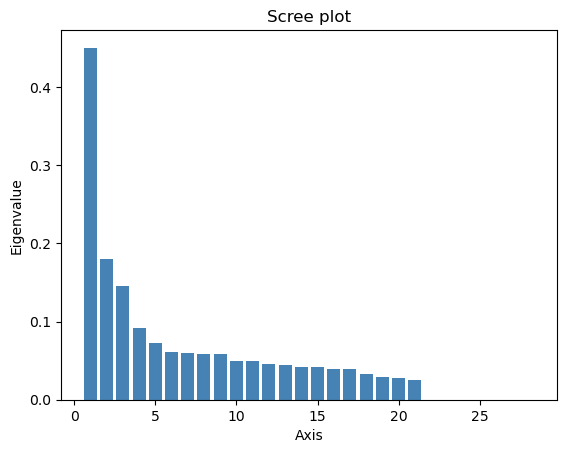

In [52]:
# Graphique des valeurs propres 
my_mca.plot_eigenvalues()

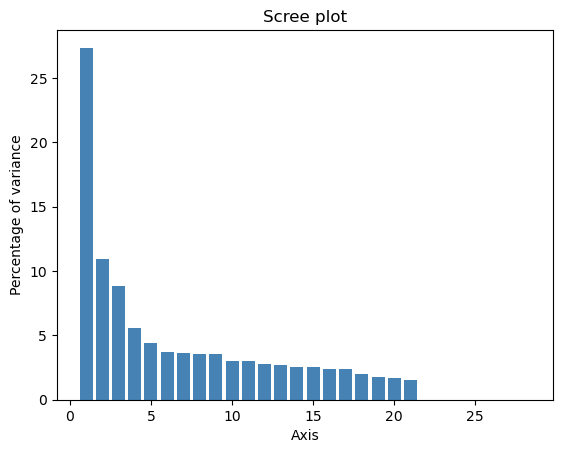

In [53]:
# Pourcentage de variance expliqué
my_mca.plot_eigenvalues(type="percentage")

**Informations sur les variables**

In [54]:
info_col = my_mca.col_topandas()
info_col.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7', 'col_coord_dim8',
       'col_coord_dim9', 'col_coord_dim10', 'col_coord_dim11',
       'col_coord_dim12', 'col_coord_dim13', 'col_coord_dim14',
       'col_coord_dim15', 'col_coord_dim16', 'col_coord_dim17',
       'col_coord_dim18', 'col_coord_dim19', 'col_coord_dim20',
       'col_coord_dim21', 'col_coord_dim22', 'col_coord_dim23',
       'col_coord_dim24', 'col_coord_dim25', 'col_coord_dim26',
       'col_coord_dim27', 'col_coord_dim28', 'col_contrib_dim1',
       'col_contrib_dim2', 'col_contrib_dim3', 'col_contrib_dim4',
       'col_contrib_dim5', 'col_contrib_dim6', 'col_contrib_dim7',
       'col_contrib_dim8', 'col_contrib_dim9', 'col_contrib_dim10',
       'col_contrib_dim11', 'col_contrib_dim12', 'col_contrib_dim13',
       'col_contrib_dim14', 'col_contrib_dim15', 'col_contrib_dim16',
       'col_contrib_dim17', 'col_contrib_dim18', 'co

In [55]:
coord_col = info_col[['col_coord_dim1', 'col_coord_dim2']]
print(coord_col)

                                         col_coord_dim1  col_coord_dim2
gender_Female                                  0.008069        0.008148
gender_Male                                   -0.007917       -0.007995
SeniorCitizen_No                              -0.105933        0.075688
SeniorCitizen_Yes                              0.547385       -0.391101
Partner_No                                     0.030819       -0.449126
Partner_Yes                                   -0.032985        0.480679
Dependents_No                                  0.126216       -0.244815
Dependents_Yes                                -0.295082        0.572357
PhoneService_No                                0.624889        0.699467
PhoneService_Yes                              -0.066998       -0.074994
MultipleLines_No                              -0.366699       -0.307885
MultipleLines_No phone service                 0.624889        0.699467
MultipleLines_Yes                              0.274970        0

In [56]:
coord_col.index

Index(['gender_Female', 'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'Pape

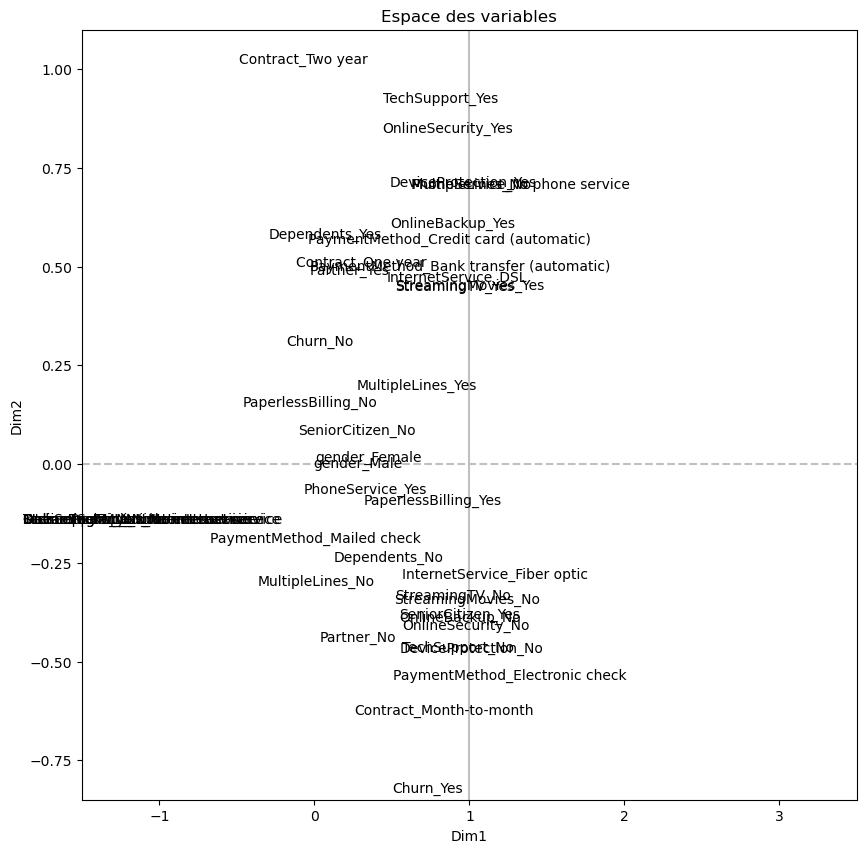

In [57]:
#Pour mieux rendre compte de la dispersion des modalités
fig, ax = plt.subplots(figsize = (10, 10))
ax.axis([-1.5, +3.5, -0.85, +1.1])
ax.plot([-1.5, +3.5], [0, 0], color = 'silver', linestyle = '--')
ax.plot([1, 1], [-0.85, +1.1], color = 'silver', linestyle = '-')
ax.set_xlabel('Dim1')
ax.set_ylabel('Dim2')
plt.title('Espace des variables')
for i in range(coord_col.shape[0]):
    ax.text(coord_col.iloc[i, 0], coord_col.iloc[i, 1], coord_col.index[i])

plt.show()

## Analyse basée sur le clustering

In [58]:
#poinds des modalités
my_mca.c_

array([[3488., 3555., 5901., 1142., 3641., 3402., 4933., 2110.,  682.,
        6361., 3390.,  682., 2971., 2421., 3096., 1526., 3498., 1526.,
        2019., 3088., 1526., 2429., 3095., 1526., 2422., 3473., 1526.,
        2044., 2810., 1526., 2707., 2785., 1526., 2732., 3875., 1473.,
        1695., 2872., 4171., 1544., 1522., 2365., 1612., 5174., 1869.]])

In [59]:
#vérification des premières variables de la variable Churn
np.unique(df['Churn'].values, return_counts=True)

(array(['No', 'Yes'], dtype=object), array([5174, 1869], dtype=int64))

In [60]:
col_mass = my_mca.c_ / (df.shape[0]*df.shape[1])
col_mass

array([[0.02476218, 0.02523782, 0.04189266, 0.00810734, 0.02584836,
        0.02415164, 0.03502059, 0.01497941, 0.00484169, 0.04515831,
        0.02406645, 0.00484169, 0.02109186, 0.01718728, 0.02197927,
        0.01083345, 0.02483317, 0.01083345, 0.01433338, 0.02192248,
        0.01083345, 0.01724407, 0.02197217, 0.01083345, 0.01719438,
        0.02465569, 0.01083345, 0.01451086, 0.01994889, 0.01083345,
        0.01921766, 0.0197714 , 0.01083345, 0.01939514, 0.02750958,
        0.01045719, 0.01203322, 0.02038904, 0.02961096, 0.01096124,
        0.01080505, 0.01678972, 0.01144399, 0.03673151, 0.01326849]])

In [61]:
#importation du module pour le clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0)

#entrainement des données pondérées avec l'option sample_weight
km.fit(X=coord_col, sample_weight=col_mass[0])

#information sur les centres de groupes 
centroids = km.cluster_centers_
print(centroids)

[[ 0.18424001  0.01475212]
 [-1.88084523 -0.15059952]]


In [62]:
coord_grp = coord_col.copy()
coord_grp["groupes"] = km.labels_
#affichage des coordonnées
coord_grp.head()

,col_coord_dim1,col_coord_dim2,groupes
gender_Female,0.008069,0.008148,0
gender_Male,-0.007917,-0.007995,0
SeniorCitizen_No,-0.105933,0.075688,0
SeniorCitizen_Yes,0.547385,-0.391101,0
Partner_No,0.030819,-0.449126,0


In [63]:
#gestion des groupes 
gb = coord_grp.groupby('groupes')
#affichage par indice
for i in gb.indices.keys():
    print("\n Groupe : ",i)
    print(coord_grp.index[gb.indices[i]])


 Groupe :  0
Index(['gender_Female', 'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes',
       'Partner_No', 'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'PhoneService_No', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_No', 'Churn_Yes'],
      dtype='object')

 Groupe :  1
In

**Mise en oeuvre de l'algorithme d'agglomération avec les resultats de l'ACM**

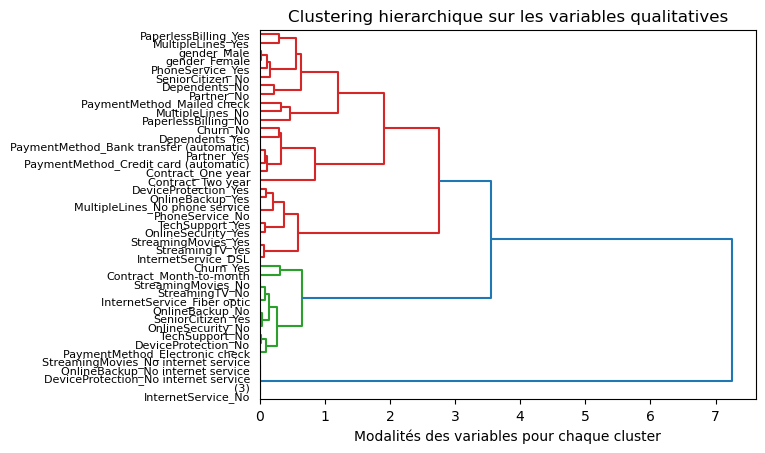

In [64]:
from scipy.cluster.hierarchy import dendrogram, ward

# Utilisation de la distance de Ward sur la matrice des coordonnées factorielles
linkage_array = ward(coord_col)

# Maintenant, nous traçons le dendrogramme pour le tableau de liens contenant les distances entre les groupes.
dendrogram(linkage_array, labels=coord_col.index, orientation ='right', truncate_mode='lastp', p=43, color_threshold=3)

ax = plt.gca()
bounds = ax.get_xbound()
plt.title('Clustering hierarchique sur les variables qualitatives')
plt.xlabel('Modalités des variables pour chaque cluster');

**Modalités liées à la fidélisation/rétention du client**

- les clients avec les facturations dématérialisées,  `PaperlessBilling_Yes`
- les clients qui diposent de plusieurs lignes,  `MultipleLines_Yes`
- Les clients des deux sexes , `gender_Male` et `gender_Male`
- les clients avec un service téléphonique, `PhoneService_Yes`
- Les clients qui sont ne sont pas âgés, `SeniorCitizen_No`
- les clients qui n'ont pas de personnes en charge, `Dependents_No`
- Les clients qui non pas de partenaire social et non pas de partenaire social, `Partner_No` et `Partner_Yes`
- les clients qui ont des modes de paiement par cheque posté, `PaymentMethod_Mailed check`, et par cheque electronique, `PaymentMethod_Electronic check`
- les clients qui ne diposent pas de plusieurs lignes, `MultipleLines_No`
- Les clients qui n'ont pas les facturations dématérialisées`PaperlessBilling_No`
- les clients qui des personnes en charge, `Dependents_Yes`
- les clients qui ont des modes de paiement par carte de credit (`PaymentMethod_credit card (automatic)`) et par transfert bancaire (`PaymentMethod_bank transfert(automatic)`)
- Les clients dont ayant une durée de contrat par an, `Contract_One year`
- les clients qui diposent d'une protection de l'appareil, `DeviceProtection_Yes`
- les clients qui disposent de sauvegarde en ligne, `OnlineBackup_Yes`
- les clients qui ne diposent pas de plusieurs lignes, `MultipleLines_No`
- les clients qui n'ont pas un service téléphonique, `PhoneService_No`
- les clients qui disposent d'un support technique, `TechSupport_Yes`
- les clients qui disposent d'une sécurité en ligne, `OnlineSecurity_Yes`
- les clients qui disposent de la télévision en streaming (`StreamingTV_Yes`) et des films en streaming (`StreamingMovies_Yes`)
- les clients qui ont un fournisseur de service internet DSL, `InternetService_DSL`
- ayant une durée de contrat mois par mois, `Contract_Month-to-month`
- les clients qui ne disposent pas de la télévision en streaming (`StreamingTV_No`) et des films en streaming (`StreamingMovies_No`)
- les clients qui ont un fournisseur de service internet par fibre optique, `InternetService_Fiber optic`
- les clients qui ne disposent pas de sauvegarde en ligne, `OnlineBackup_No`
- Les clients qui sont âgés `SeniorCitizen_Yes`
- les clients qui ne disposent pas de sécurité en ligne, `OnlineSecurity_No`
- les clients qui ne disposent pas de support technique, `TechSupport_No`
- les clients qui ne diposent pas d'une protection de l'appareil, `DeviceProtection_No`

# Feature Engeneering

In [65]:

from sklearn.impute import KNNImputer 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder 

**Création de nouvelle variable par discrétisation**

In [66]:
#Nous construisons un tableau de cases avec une valeur minimale et une valeur maximale
bin = np.linspace(min(df['tenure']), max(df["tenure"]), 7)

#definition des groupe
group_name = ["New_subscrib", "two_year_subscrib", "three_year_subscrib", "four_year_subscrib", "five_year_subscrib", "six_year_subscrib"]

#creation d'une variable à partir de la fonction cut
df["seniority_company"] = pd.cut(x=df["tenure"], bins = bin, labels=group_name, include_lowest=True)
df[["seniority_company", "tenure"]].head()

,seniority_company,tenure
0,New_subscrib,1
1,three_year_subscrib,34
2,New_subscrib,2
3,four_year_subscrib,45
4,New_subscrib,2


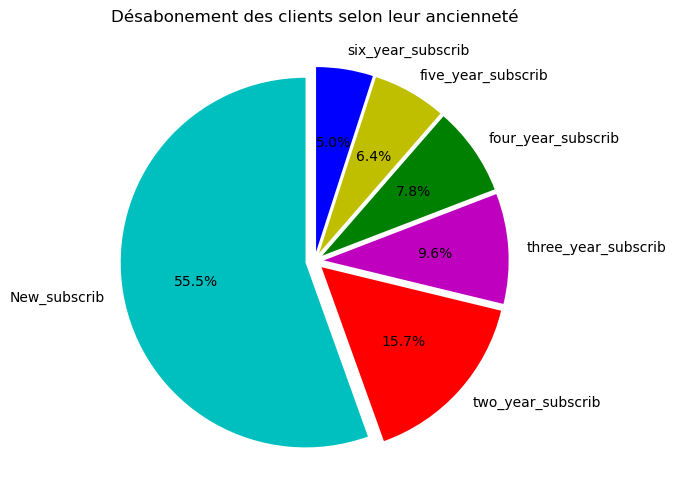

In [67]:
seniority = df[df["Churn"]=="Yes"]["seniority_company"].value_counts()
seniority = [seniority[0]/sum(seniority)*100, seniority[1]/sum(seniority)*100, seniority[2]/sum(seniority)*100, 
             seniority[3]/sum(seniority)*100, seniority[4]/sum(seniority)*100, seniority[5]/sum(seniority)*100]

#representation graphique
plt.figure(figsize=(10, 6))
plt.pie(seniority, 
        labels=["New_subscrib", "two_year_subscrib", "three_year_subscrib", 
                "four_year_subscrib", "five_year_subscrib", "six_year_subscrib"], 
        autopct="%1.1f%%", 
        startangle=90, 
        explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05),
        colors=["c", "r", "m", "g", "y", "b"])
plt.title("Désabonement des clients selon leur ancienneté");

**Etude de la relation entre l'ancienneté des clients et leur désabonnement**

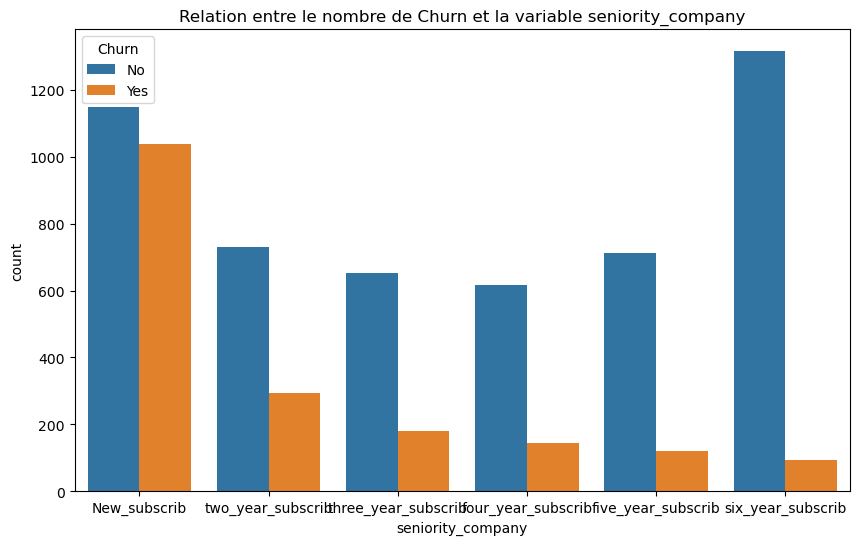

matice de contingence (Frequences observées)
Churn                  No   Yes
seniority_company              
New_subscrib         1149  1037
two_year_subscrib     730   294
three_year_subscrib   652   180
four_year_subscrib    617   145
five_year_subscrib    712   120
six_year_subscrib    1314    93


Coefficient T de Tschuprow : 0.35224231722345734
P-valeur : 1.209674165469595e-186


In [68]:
tests_varqual(df['seniority_company'], df['Churn'])

**Création d'une variable liée au nombre de service auxquels le client a souscrit dans l'entreprise**

In [69]:
#variables liées au service de l'entreprise
df1 = df[['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
    'DeviceProtection', 'OnlineBackup', 'TechSupport', 'StreamingMovies',
    'StreamingTV']]

numbr = []
for k in np.arange(1, df1.shape[0]+1):
    cpt = 0
    for i in np.arange(df1.shape[1]):
        if (df1.iloc[k-1:k, i].values=='Yes'):
            cpt = cpt+1
    numbr+=[cpt]

df = df.assign(NumberServices = numbr)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,seniority_company,NumberServices
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,New_subscrib,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,three_year_subscrib,3
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New_subscrib,3
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,four_year_subscrib,3
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New_subscrib,1


In [70]:
#tranformation de la variable en variable catégorielle 
df['NumberServices'] = df['NumberServices'].astype('object')
df['NumberServices'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: NumberServices
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.1+ KB


**Etude de la relation entre la nouvelle variable nombre de service auxquels le client à souscrit dans l'entreprise**

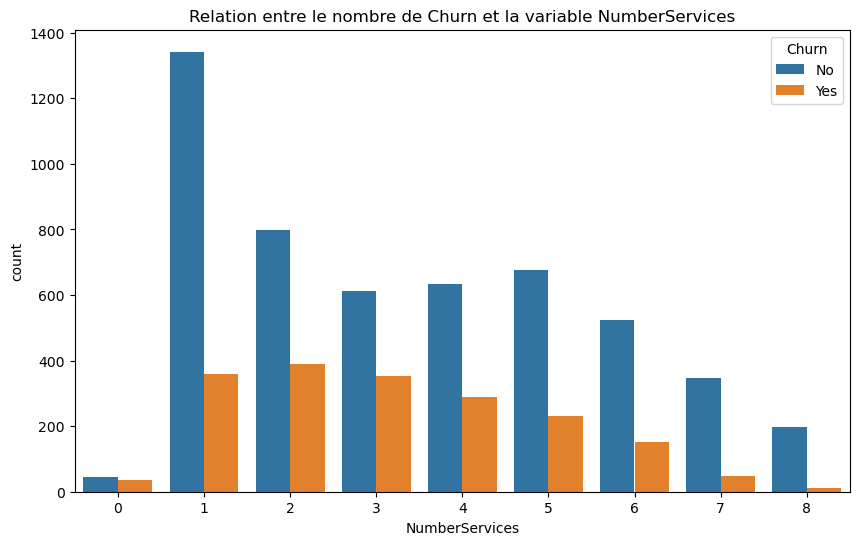

matice de contingence (Frequences observées)
Churn             No  Yes
NumberServices           
0                 45   35
1               1342  359
2                798  390
3                613  352
4                633  289
5                676  232
6                524  152
7                346   49
8                197   11


Coefficient T de Tschuprow : 0.17538538104870713
P-valeur : 1.970904567298619e-42


In [71]:
tests_varqual(df['NumberServices'], df['Churn'])

### Data Scaling

**MinMax scaler**

In [72]:
num_col = ["tenure", "MonthlyCharges", "TotalCharges"]
mm = MinMaxScaler()
mm_result = mm.fit_transform(df[num_col])
df_mm= pd.DataFrame(mm_result, columns=num_col)
print("Standard Scaler : ")
print(df_mm)

Standard Scaler : 
        tenure  MonthlyCharges  TotalCharges
0     0.013889        0.115423      0.001275
1     0.472222        0.385075      0.215867
2     0.027778        0.354229      0.010310
3     0.625000        0.239303      0.210241
4     0.027778        0.521891      0.015330
...        ...             ...           ...
7038  0.333333        0.662189      0.227521
7039  1.000000        0.845274      0.847461
7040  0.152778        0.112935      0.037809
7041  0.055556        0.558706      0.033210
7042  0.916667        0.869652      0.787641

[7043 rows x 3 columns]


**Label Encoding et One-Hot Encoding**

In [73]:
# Label encoding
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
print("Label encoding : ")
print(df[['Churn']].value_counts(normalize=True))

Label encoding : 
Churn
0        0.73463
1        0.26537
dtype: float64


In [74]:
# One-hot encoding
cat_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'seniority_company', 'NumberServices']
ohe = OneHotEncoder(sparse=False)
ohe_result = ohe.fit_transform(df[cat_col])
df_ohe= pd.DataFrame(ohe_result, columns=ohe.get_feature_names(cat_col))
print("One-hot encoding : ")
print(df_ohe)

One-hot encoding : 
      gender_Female  gender_Male  SeniorCitizen_No  SeniorCitizen_Yes  \
0               1.0          0.0               1.0                0.0   
1               0.0          1.0               1.0                0.0   
2               0.0          1.0               1.0                0.0   
3               0.0          1.0               1.0                0.0   
4               1.0          0.0               1.0                0.0   
...             ...          ...               ...                ...   
7038            0.0          1.0               1.0                0.0   
7039            1.0          0.0               1.0                0.0   
7040            1.0          0.0               1.0                0.0   
7041            0.0          1.0               0.0                1.0   
7042            0.0          1.0               1.0                0.0   

      Partner_No  Partner_Yes  Dependents_No  Dependents_Yes  PhoneService_No  \
0            0.0      

In [75]:
df1 = pd.concat([df_mm, df_ohe], axis=1)
pd.set_option("display.max.columns", df1.shape[0])
df1.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,seniority_company_New_subscrib,seniority_company_five_year_subscrib,seniority_company_four_year_subscrib,seniority_company_six_year_subscrib,seniority_company_three_year_subscrib,seniority_company_two_year_subscrib,NumberServices_0,NumberServices_1,NumberServices_2,NumberServices_3,NumberServices_4,NumberServices_5,NumberServices_6,NumberServices_7,NumberServices_8
0,0.013889,0.115423,0.001275,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.472222,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.027778,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.625000,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.027778,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modelisation

#### Rééchantillonage SMOTE (Synthetic Minority Over-sampling Technique)

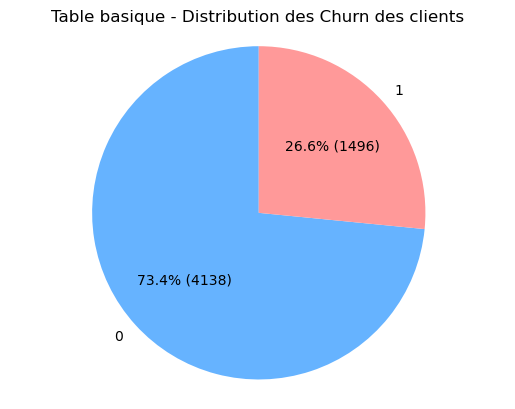

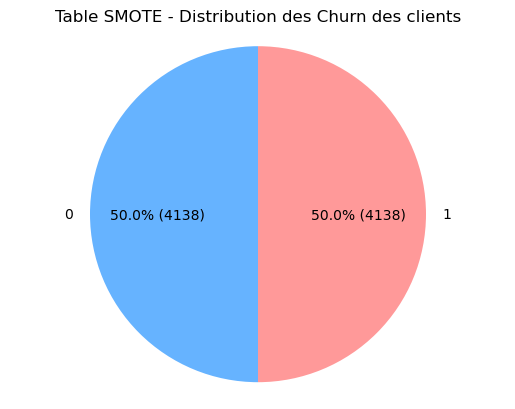

In [ ]:
from sklearn.model_selection import train_test_split
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fonction pour créer un pie chart avec les proportions et les nombres
def plot_pie_chart(y, title):
    labels = ['0', '1']
    sizes = y.value_counts().values
    colors = ['#66b3ff', '#ff9999']
    
    # Modifier le format des labels pour inclure les proportions et les nombres
    def autopct_format(pct, all_values):
        absolute = int(round(pct / 100 * sum(all_values)))
        return f"{pct:.1f}% ({absolute})"

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: autopct_format(pct, sizes), startangle=90)
    ax.axis('equal')  # Pour assurer que le diagramme est bien rond
    plt.title(title)
    plt.show()

## Rééchantillonge SMOTE sur la base d'apprentissage
from imblearn.over_sampling import SMOTE

# Initialiser l'objet SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Appliquer le rééchantillonnage SMOTE sur les données d'apprentissage
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
y_train_smote = pd.DataFrame(data=y_train_smote, columns=["Churn"])

# Créer un pie chart pour la table basique
plot_pie_chart(y_train, "Table basique - Distribution des Churn des clients")

# Afficher la nouvelle distribution des données
plot_pie_chart(y_train_smote, "Table SMOTE - Distribution des Churn des clients")


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_classif, RFE
from sklearn.impute import KNNImputer 
from sklearn.model_selection import (KFold, StratifiedKFold, LeaveOneOut, 
                                     cross_val_score, validation_curve, validation_curve, 
                                     GridSearchCV)
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.metrics import (f1_score, roc_auc_score, confusion_matrix, 
                             roc_curve, classification_report)

In [ ]:
df1 = df.drop(["Churn"], axis = 1)
X = pd.get_dummies(data=df1, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'
       , 'seniority_company', 'NumberServices'])
X.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
     

Variables qui vont entrer dans la modélisation. Ces variables sont celles qui ont été jugées plus pertinente Par la regression de Lasso pour la modélisation 

In [ ]:
numerical_features = ["tenure", "TotalCharges"]

categorical_features = ['gender_Female', 'SeniorCitizen_No',
       'SeniorCitizen_Yes', 'Partner_No', 'Dependents_No', 'Dependents_Yes',
       'MultipleLines_No', 'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineBackup_No',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_Two year',
       'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'seniority_company_New_subscrib',
       'seniority_company_five_year_subscrib',
       'seniority_company_four_year_subscrib',
       'seniority_company_six_year_subscrib',
       'seniority_company_three_year_subscrib',
       'seniority_company_two_year_subscrib', 'NumberServices_1',
       'NumberServices_2', 'NumberServices_3', 'NumberServices_4',
       'NumberServices_5', 'NumberServices_6', 'NumberServices_8']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f'{X_train.shape} et {y_train.shape}')
print("\n")
print(f"{X_test.shape} et {y_test.shape}")

(5282, 61) et (5282,)


(1761, 61) et (1761,)


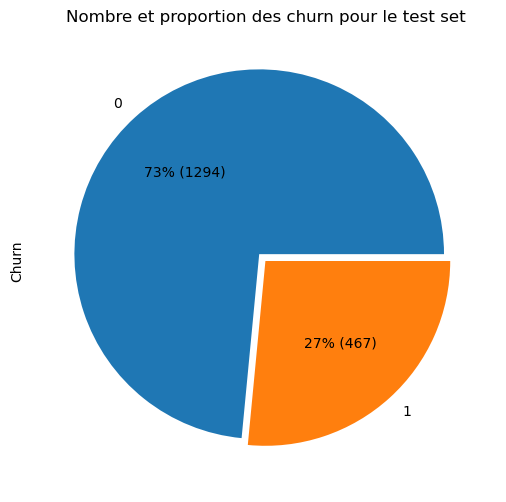

In [ ]:
#calculer la proportion et le nombre de chaque catégorie
#calcul de la proportion de chaque catégorie
prop = y_test
prop.columns = ["Churn", "proportion"]

#graphique en secteur pour les frequences de chaque catégorie
plt.figure(figsize = (8, 6))
ax = y_test.value_counts().plot(kind = "pie", explode = (0.05,0), autopct = lambda x: f'{x:.0f}% ({x/100*len(y_test):.0f})')

#ajustement du titre
plt.title("Nombre et proportion des churn pour le test set");

**Mise en place de la Pipeline**

In [ ]:
def pipeline_fonction(estimator):
    
    # Définir une échelle standard pour normaliser les entrées
    scaler = MinMaxScaler()
    #definir la methode d'imputation
    impter = KNNImputer()
    #définiton de la méthode de ré-échantillonnage
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    #encodage pour les variables catégorielles
    encoder = OneHotEncoder()
    #methode de selection des variables 
    feature_select = VarianceThreshold(threshold=0.1)

    numerical_pipeline = Pipeline(steps=[("impter", KNNImputer(n_neighbors=3)), 
                                        ("scaler", MinMaxScaler()),
                                        ("feature_select", SelectKBest(score_func=f_classif, k='all'))])

    categorical_pipeline = Pipeline(steps=[("encoder", OneHotEncoder()),
                                        ("selector", VarianceThreshold(threshold=0.23))])

    preprocessor = ColumnTransformer(transformers=[('numeric_preprocessing', numerical_pipeline, numerical_features), 
                                                ("catégorical_preprocessing", categorical_pipeline, categorical_features)])

    model_pipeline = imbpipeline(steps=[('preprocessor', preprocessor), ("smote", SMOTE(sampling_strategy='auto', random_state=42)),
                                        ('pca', PCA(n_components=2)), 
                                        ('estimator', RFE(estimator, n_features_to_select = 5))])
    
    return model_pipeline

## Le Modèle d'evaluation

In [ ]:
from xgboost import XGBClassifier
#les différents paramètres des arbres de decision dans la grille
pipeline_fonction(XGBClassifier(n_erandom_state=42)).get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessor', 'smote', 'pca', 'estimator', 'preprocessor__n_jobs', 'preprocessor__remainder', 'preprocessor__sparse_threshold', 'preprocessor__transformer_weights', 'preprocessor__transformers', 'preprocessor__verbose', 'preprocessor__verbose_feature_names_out', 'preprocessor__numeric_preprocessing', 'preprocessor__catégorical_preprocessing', 'preprocessor__numeric_preprocessing__memory', 'preprocessor__numeric_preprocessing__steps', 'preprocessor__numeric_preprocessing__verbose', 'preprocessor__numeric_preprocessing__impter', 'preprocessor__numeric_preprocessing__scaler', 'preprocessor__numeric_preprocessing__feature_select', 'preprocessor__numeric_preprocessing__impter__add_indicator', 'preprocessor__numeric_preprocessing__impter__copy', 'preprocessor__numeric_preprocessing__impter__metric', 'preprocessor__numeric_preprocessing__impter__missing_values', 'preprocessor__numeric_preprocessing__impter__n_neighbors', 'preprocessor__numeric_prepro

In [ ]:
#methode de validation croisée
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Définition des paramètres à optimiser
param_grid = {
    # max_depth est la profondeur maximale de chaque arbre. Une valeur plus élevée rendra le modèle plus complexe et pourrait entraîner un surapprentissage.
    'estimator__estimator__max_depth': [3, 4, 5, 6, 7, 8],
    # learning_rate (ou taux d'apprentissage) est le pas d'ajustement effectué à chaque étape de l'optimisation. Une valeur plus faible rendra l'apprentissage plus lent.
    'estimator__estimator__learning_rate': [0.001, 0.01, 0.1, 0.2],
    # n_estimators est le nombre d'arbres à construire.
    'estimator__estimator__n_estimators': [10, 15, 20, 30, 100, 200, 300],
    'pca__n_components': list(range(1, 3 ,1))      
}

grid_search = GridSearchCV(estimator=pipeline_fonction(XGBClassifier(random_state=42)),
                           param_grid=param_grid,
                           scoring='f1',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.6116403441009165
Test score: 0.5846672283066554


In [ ]:
#meilleurs hyperparamètres et meilleur score 
grid_search.best_params_

{'estimator__estimator__learning_rate': 0.1,
 'estimator__estimator__max_depth': 4,
 'estimator__estimator__n_estimators': 20,
 'pca__n_components': 2}

In [ ]:
xgboost = pipeline_fonction(XGBClassifier(n_estimators=20, learning_rate=0.1, max_depth=4, random_state=42))

# Entraîner le modèle sur les données d'entraînement
xgboost.fit(X_train, y_train)

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = xgboost.predict(X_train)
y_test_pred = xgboost.predict(X_test)

# Calculer les mesures de performance
train_f = f1_score(y_train, y_train_pred)
test_f = f1_score(y_test, y_test_pred)
# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({'Métrique': ['F1'],'Ensemble d\'entraînement': [train_f],'Ensemble de test': [test_f]})

# Afficher le tableau d'évaluation des performances
print(performance_table)

  Métrique  Ensemble d'entraînement  Ensemble de test
0       F1                 0.623016          0.584667


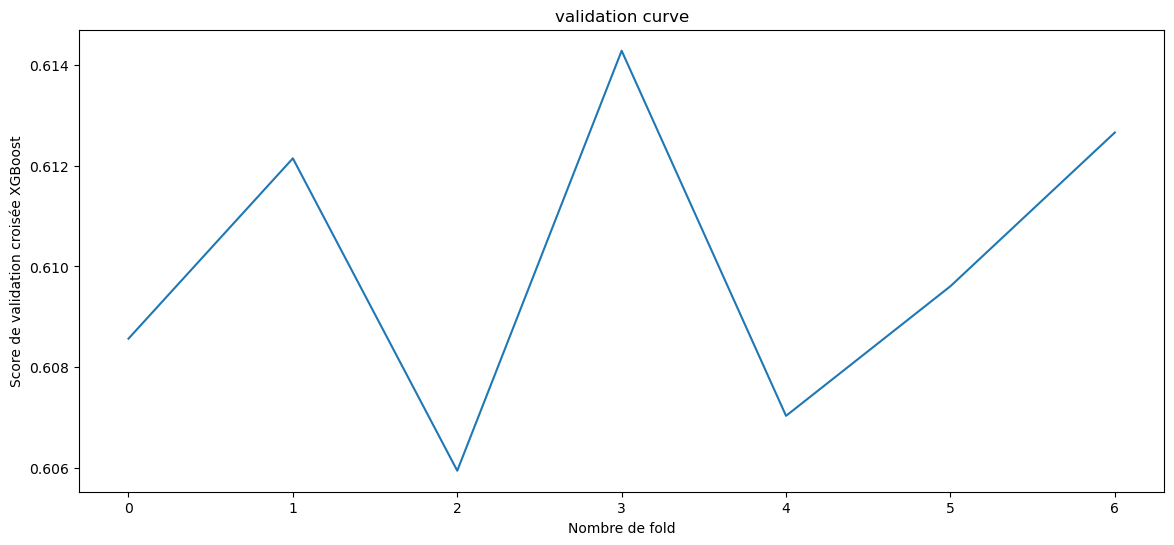

In [ ]:
val_score = []
for k in np.arange(3, 10):
    score = cross_val_score(xgboost, X_train, y_train, 
                            cv=StratifiedKFold(k), scoring = 'f1').mean()
                            
    val_score.append(score)

plt.figure(figsize=(14, 6))
plt.plot(val_score)
plt.xlabel("Nombre de fold")
plt.ylabel("Score de validation croisée XGBoost")
plt.title("validation curve"); 

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1294
           1       0.48      0.74      0.58       467

    accuracy                           0.72      1761
   macro avg       0.68      0.73      0.69      1761
weighted avg       0.78      0.72      0.73      1761



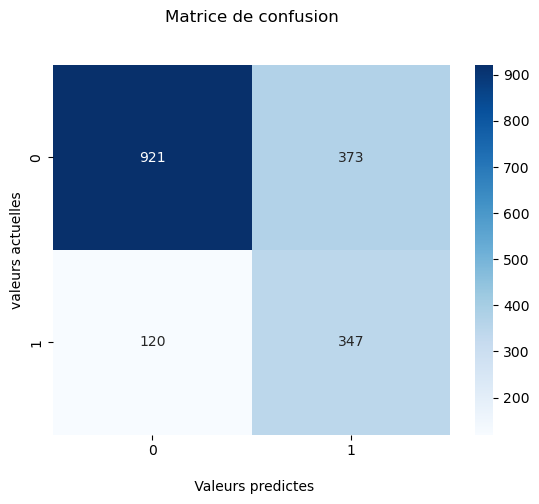

In [ ]:
#matrice de confusion
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Matrice de confusion\n\n')
    ax.set_xlabel('\n Valeurs predictes')
    ax.set_ylabel('valeurs actuelles');

calculate_metrics(xgboost, 'XGBoost - Pipeline', X_test, y_test)

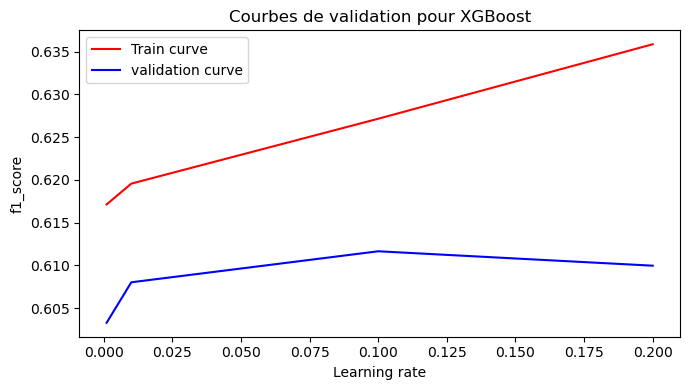

In [ ]:
#paramètres du taux d'apprentissage
param_range=[0.001, 0.01, 0.1, 0.2]

train_score, val_score = validation_curve(xgboost, X_train, y_train,
                                          cv=stratified_kfold, 
                                          scoring="f1",
                                          n_jobs=-1,
                                          param_name="estimator__estimator__learning_rate", 
                                          param_range=param_range)

#calcul de la moyenne et de l'ecart type des données d'entrainnement
train_scores_mean = np.mean(train_score, axis=1)

#calcul de la moyenne et de l'ecart type des données de tests 
test_scores_mean = np.mean(val_score, axis=1)

plt.subplots(1, figsize = (7, 4))
plt.plot(param_range, train_scores_mean, label = "Train curve", color = 'r')
plt.plot(param_range, test_scores_mean, label = "validation curve", color = 'blue')
plt.title("Courbes de validation pour XGBoost")
plt.legend()
plt.ylabel('f1_score')
plt.xlabel('Learning rate')
plt.tight_layout();

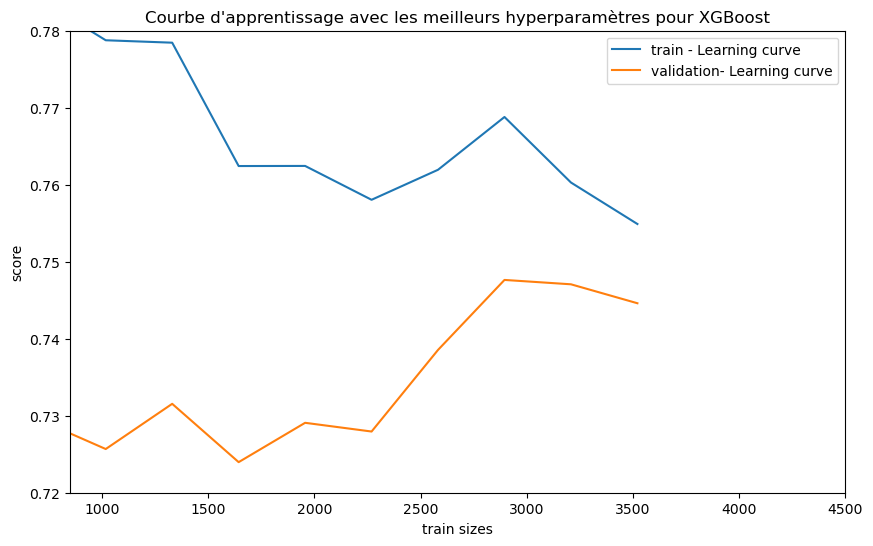

In [ ]:
from sklearn.model_selection import learning_curve

n, train_score, val_score = learning_curve(xgboost, 
                                           X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 10), cv = stratified_kfold)

plt.subplots(1, figsize=(10, 6))
plt.plot(n, train_score.mean(axis = 1), label = 'train - Learning curve')
plt.plot(n, val_score.mean(axis = 1), label = 'validation- Learning curve')
plt.xlabel('train sizes')
plt.ylabel('score')
plt.title("Courbe d'apprentissage avec les meilleurs hyperparamètres pour XGBoost")

plt.xlim([850, 4500])
plt.ylim([0.72, 0.78])
plt.legend();